In [ ]:
# %pip install numpy matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Indexing Multidimensional Arrays

Numpy arrays work the same way as other sequences, but they can have multiple dimensions (rows, columns, etc) over which to index/slice the array.

```python
data = np.array([[0, 1, 2,  3],
                 [4, 5, 6,  7],
                 [8, 9, 10, 11]]
               )
second_row = data[1, :]
third_column = data[:, 2]
```

**Exercises**

Using the example dataset *scores*, select only the described elements from each list:

In [2]:
scores = np.arange(1, 49).reshape(6, 8)
scores

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48]])

**Example:** The first score in the 2nd row:

In [3]:
scores[1, 0]

9

The fourth score in the first row:

the second score in the fifth row:

The third score in the sixth column:

The third-through-fifth columns:

The first-through-fourth columns:

The second-through-fourth **rows**:


## Working with Images

Image data is stored as a 3D matrix, storing the brightness of each pixel along 3 coordinates:

  0. Which row the pixel is in  (between 0 and the height of the image)
  1. Which column the pixel is in (betweeen 0 and the width of the image)
  2. What color channel the pixel is in (red, green, blue, and sometimes alpha)

White pixels usually have the highest brightness values, and black pixels the darkest.

If you zoom in enough, you can see the square grid.  For example, as we zoom in on this heart we start to see the square pixels that make it up:

<img src="https://www.pinclipart.com/picdir/middle/531-5317564_heart-pixel-art-8-bit-heart-png-clipart.png" width="300">

This means that visualizing any image in Python can be done by "plotting" a matrix!  
Let's load an image and visualize it onscreen using Matplotlib, a plotting library.  Working with images generally uses these 3 functions:

| Function | Purpose  | Example |
| :----:   | :----:   | :---:   |
| **`plt.imread()`** | Loads a image from a filename  | `plt.imread("brian.png")` |
| **`plt.imshow()`** | Plots a multidimensional array as an image | `plt.imshow(my_image_array)` |
| **`plt.imsave()`** | Saves an array as an image on the computer | `plt.imsave("new_image.jpg", my_array)` |



In [2]:
from os import makedirs, mkdir
from PIL import Image
from urllib.request import urlopen
from pathlib import Path
from io import BytesIO

savedir = Path("images")
savedir.mkdir(exist_ok=True)
urls = [
    ("https://www.reed.edu/biology/professors/srenn/pages/teaching/web_2007/hlm20071105/images/brain.jpg", "brains.jpg"),
    ("http://www.bio.umass.edu/microscopy/images/gfpxxx1.jpg", "cells.jpg"),
    ("https://medievalists.gumlet.io/wp-content/uploads/2015/04/Favourite-Scene-from-Monty-Python-and-the-Holy-Grail.jpg", "montypython.jpg"),
    ("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Skull_and_brain_normal_human.svg/800px-Skull_and_brain_normal_human.svg.png", "skull.png"),
    ("https://upload.wikimedia.org/wikipedia/commons/f/f1/MultiPhotonExcitation-Fig10-doi10.1186slash1475-925X-5-36-clipping.JPEG", "intestine.jpg")
]
for url, filename in urls:
    downloaded_data = urlopen(url).read()
    inmemory_file = BytesIO(downloaded_data)
    img = Image.open(inmemory_file)
    img.save(savedir / filename)


**Exercises**

**Example**: Read and Plot the Skull image in the `images` folder.

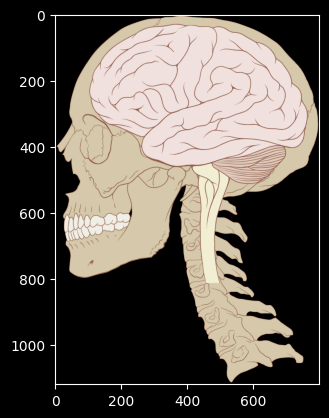

In [3]:
im = plt.imread('images/skull.png')
plt.imshow(im);

Read and plot the mouse intestine image in the images folder:

Read and plot the "Cells" image in the images folder.

**Example**: Using the Cells image, index only the first 50 rows of the image and plot it, then save it as "top_part.png".  (This is called "cropping" an image)

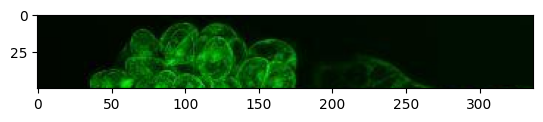

In [ ]:
cropped = im[:50, :]
plt.imshow(cropped);
plt.imsave("top_part.png", cropped)

Crop and Plot only the left cluster of cells, then save the image as "left_cluster.png".

Crop and Plot only the right cluster of cells, then save the image as "right_cluster.png".

Load the Brains image and show it (should see a picture with lots of different brains), but only plot the Human brain.  Save the image as `human_brain.png`.

## Analyzing Image Data: Examining Each Channel of a Color Image

Flourescent imaging is made so that each color channel contains data from a different source.  Matrices represent Color images put this data into its own axis.  In matplotlib, the color channel is the third axis, with the data ordered RGB channels.


For the section on separating channels, here's a markdown table summarizing the methods used along with one-line explanations:

| Code | Description |
| ------ | ----------- |
| `channel = image[:,:,0]` | Extracts the first channel (red in an RGB image) from the image array. |
| `plt.imshow(channel, cmap='gray')` | Displays a single channel (grayscale) image with a specified colormap. |


**Exercises**

Each of the exercises below use a two-photon image of a mouse intestine.  In this image, red channels label actin filaments, the green label cell nuclei, and the blue cells label goglet cells.

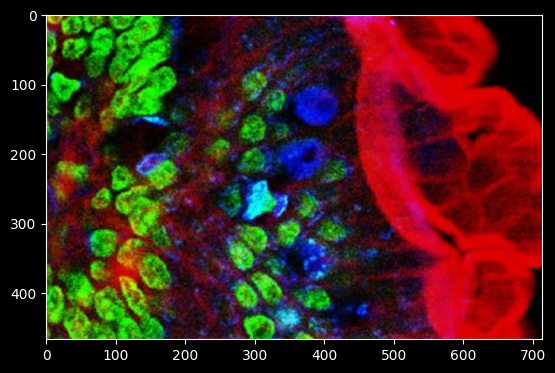

In [5]:
image = plt.imread('images/intestine.jpg')
plt.imshow(image);


**Example** Plot only red channel, using the "gray" colormap.

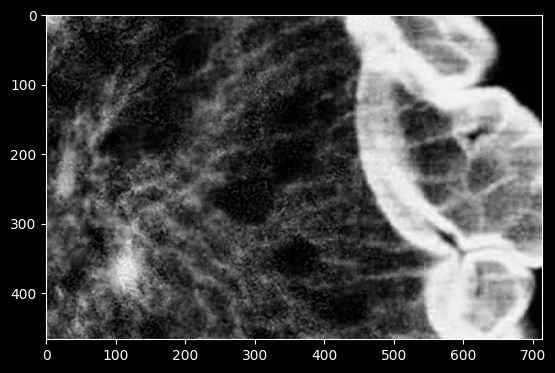

In [6]:
image = plt.imread('images/intestine.jpg')
red_channel = image[:, :, 0]
plt.imshow(red_channel, cmap='gray');
# plt.colorbar();  # Show a reference colorbar.

Plot only the green channel, using the "gray" colormap.

Plot only the blue channel, using the "gray" colormap.

Plot only the blue channel, using the "viridis" colormap.

Plot only the green channel, using the "magma" colormap.

Matplotlib has dozens of colormaps, all good for different purposes.  Let's try some out!  Using the reference [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html), replace the `cmap` value in the code below to plot the green channel's data using three different colormaps:

In [ ]:
image = plt.imread('images/intestine.jpg')
green_chan = image[:, :, 1]
fig = plt.figure(figsize=(100, 30))

# Left subplot
plt.subplot(1, 3, 1)
plt.imshow(green_chan, cmap='gray')
plt.axis('off')

# Middle subplot
plt.subplot(1, 3, 2)
plt.imshow(green_chan, cmap='gray')
plt.axis('off')  # hide the axis number labels (just show the image)

# Right subplot
plt.subplot(1, 3, 3)
plt.imshow(green_chan, cmap='gray');
plt.axis('off')

### Aggregating Across Axes

| Function | Method |
| :---  | :--- |
| `np.mean(x, axis=0)` | `x.mean(axis=0)` |
| `np.std(x, axis=0)`  | `x.std(axis=0)`  |
| `np.median(x, axis=0)` | *(No median method)* |

Almost all of the Numpy aggregation functions have an **axis** option, which lets you limit the operation to just that axis.  

For example, to get the mean of all columns:

```python
>>> array = np.arange(12).reshape(3, 4)
>>> array.mean(axis=0)
array([4., 5., 6., 7.])
```

And the mean of the rows:

```python
>>> array.mean(axis=1)
array([1.5, 5.5, 9.5])
```

Notice that the number of dimensions goes down by default whenever you aggregate across the axis.  If you'd like to keep the dimensions the same, you can also use the **keepdims=True** option:

```python
>>> array.mean(axis=1, keepdims=True)
array([[1.5],
       [5.5],
       [9.5]])
```

**Exercises**: Try it out for yourself, with the provided array `data`:

In [ ]:
np.random.seed(42)
data = np.random.randint(0, 10, size=(5, 3)) * [1, 10, 100]
data

array([[  6,  30, 700],
       [  4,  60, 900],
       [  2,  60, 700],
       [  4,  30, 700],
       [  7,  20, 500]])

*Example*: What is the mean of each column?

In [ ]:
data.mean(axis=0)

array([  4.6,  40. , 700. ])

What is the standard deviation of each row?

What is the maximum of each column?

What is the mean of each column's median?

What is the standard deviation of all the numbers in the matrix?

What is the maximum of each row?

## Analyzing Data with Histograms and Line Plots

| Function | Method |
| :---  | :--- |
| `plt.hist(array_1d, bins=31)` | Plot a histogram of the data in a 1D array |
| `plt.hist(x.flatten(), bins=31)` | Make multidimensional data 1D, then plot a histogram. |
| `plt.plot(array_1d, 'r')` | plot the array as a one-dimensional red line. |

**Exercises**

**Example**: How does the average green brightness level change in the image as you look left-to-right in it?

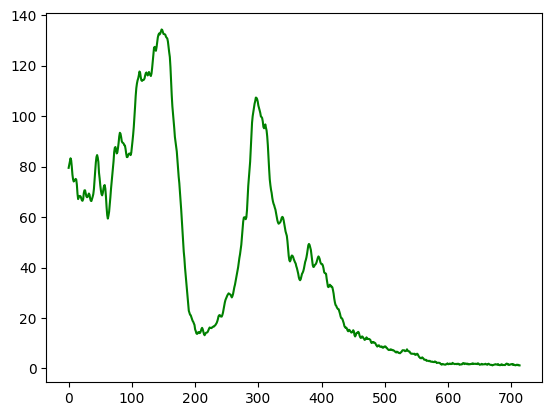

In [ ]:
image = plt.imread('images/intestine.jpg')
av_green_brightness = image[:, :, 1].mean(axis=0)
plt.plot(av_green_brightness, 'g');

How does the average red brightness level change in the image as you look left-to-right in it?

Plot the average brightness of each "intenstine" image color's columns in the same figure, showing how the image is mostly green on the left of the image, mostly blue in the middle of the image, and mostly red on the right of the image.

**Example**: What is the distribution of green brightness levels in the image?

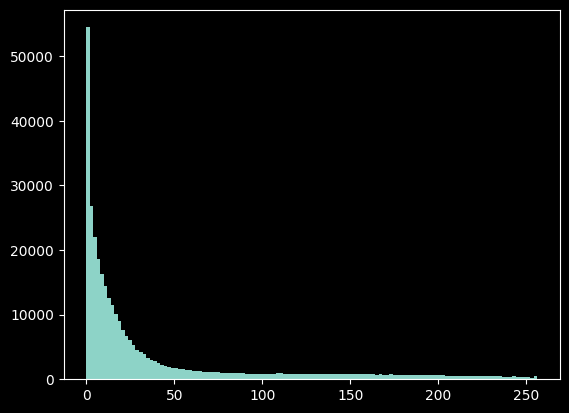

In [7]:
image = plt.imread('images/intestine.jpg')
green_chan = image[:, :, 1]
plt.hist(green_chan.flatten(), range=(0, 256), bins=128);

What is the distribution of red brightness levels in the image?

What is the distribution of blue brightness levels in this image?

## (Extra Challenge): Swapping around Color Channels

| Code | Description |
| :-- | :-- |
| `np.zeros(array.shape, array.dtype)` | Makes an array of zeros, with the same shape and dtype as another array |
| `np.zeros_like(array)` | Makes an array of zeros, with the same shape and dtype as another array |
| `im2[:, :, 0] = im1[:, :, 1]` | Copy the green channel from image 1 into the red channel of image 2. |

**Exercise**: Make a new image from `intestine.jpg`, where all the color channels have swapped with each other (e.g. red is now green, green is now blue, blue is now red).
